In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#入力データのロード
x = np.load('x.npy')
#教師用データのロード
t = np.load('t.npy')

In [3]:
#tをN*3行列にする
t_bk=t
t=np.zeros((len(t),3))
for i in range(t.shape[0]):
    j=int(t_bk[i])
    t[i][j]=1.0

In [5]:
#パラメータ定義
#出力値の個数
K=3

x_range0=[min(x[:,0])-1,max(x[:,0])+1]
x_range1=[min(x[:,1])-1,max(x[:,1])+1]

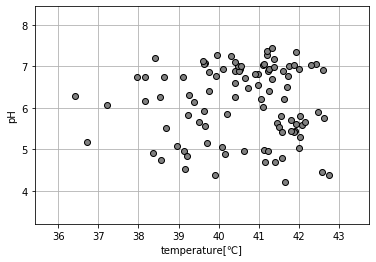

In [6]:
#入力データの図示
plt.plot(x[:,0],x[:,1],linestyle='none',markeredgecolor='black',marker='o',color='gray')
plt.xlim(x_range0)
plt.ylim(x_range1)
plt.xlabel('temperature[℃]')
plt.ylabel('pH')
plt.grid(True)
plt.show()

In [12]:
#シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#ソフトマックス関数
def softmax(a,u):
    return np.exp(a) / u

In [7]:
#２層フィードフォワードニューラルネットワークモデル
def FNN(x,w,v,M,K):
    #x:入力データ  (N*D)→入力データはNセット分、まとめて一度に処理させる。入力データ１セットに対し出力値１セットを得る。
    #w:中間層への重み行列 (M*(D+1))
    #v:出力層への重み行列 (K*(M+1))
    #M:中間層の次元
    #K:出力層の次元
    N,D = x.shape
    b=np.zeros((N,M+1))  #中間層の入力総和
    z=np.zeros((N,M+1))  #中間層の出力
    a=np.zeros((N,K))    #出力層の入力総和
    y=np.zeros((N,K))    #出力層の出力
    
    #(1~n)個目の入力データセットについての処理
    for n in range(N):
        #中間層の計算
        for m in range(M):
            #入力データxを利用し、入力総和bのm番目の要素の算出を行う。結果はb[n,m]
            b[n,m]=np.dot(w[m,:],np.r_[x[n,:],1])
            #入力総和をシグモイド関数で出力値にする
            z[n,m]=sigmoid(b[n,m]) 

        #出力層の計算
        z[n,M] = 1  #最後のダミー用データ
        u=0
        for k in range(K):
            #中間層からの入力データzを利用し、入力総和aのk番目の要素の算出を行う。結果はa[n,k]
            a[n,k]=np.dot(v[k,:],z[n,:]) 
            #ソフトマックス関数用の入力総和
            u+=np.exp(a[n,k])
        for k in range(K):
            y[n,k]=np.exp(a[n,k])/u
    return y,a,z,b
            

In [8]:
#誤差逆伝搬法
#∂E/∂w、∂E/∂vを求める
def back_propagation(w,v,M,K,x,t):
    N,D=x.shape
    y,a,z,b=FNN(x,w,v,M,K)
    dw=np.zeros((M,D+1))
    dv=np.zeros((K,M+1))
    delta1=np.zeros(M)
    delta2=np.zeros(K)
    
    for n in range(N):
        for k in range(K):
            delta2[k]=(y[n,k]-t[n,k])
        for j in range(M):
            delta1[j]=z[n,j]*(1-z[n,j])*np.dot(v[:,j],delta2)
        for k in range(K):
            dv[k,:]=dv[k,:]+delta2[k]*z[n,:]/N
        for j in range(M):
            dw[j,:]=dw[j,:]+delta1[j]*np.r_[x[n,:],1]/N
    return dw,dv


In [9]:
#誤差逆伝搬法を利用した勾配法
def Fit_back_propagation(w_init,v_init,M,K,x,t,n,alpha):
    w=w_init
    v=v_init
    for i in range(n):
        dw,dv=back_propagation(w,v,M,K,x,t)
        w-=alpha*dw
        v-=alpha*dv
    return w,v

In [13]:
#テスト
M=2
K=3
D=len(x[0])
w=np.ones((M,D+1))
v=np.ones((K,M+1))


N=1000
alpha=0.5

start_time=time.time()

w,v=Fit_back_propagation(w,v,M,K,x,t,N,alpha)

finish_time=time.time()

print("Calculation time:{:.5f} sec".format(finish_time-start_time))

print(w)
print(v)

Calculation time:10.08945 sec
[[1. 1. 1.]
 [1. 1. 1.]]
[[0.9733454  0.9733454  0.9733454 ]
 [1.10100948 1.10100948 1.10100948]
 [0.92564512 0.92564512 0.92564512]]
